In [32]:
library(dplyr)

                                     Book.title          Author.name
 A Different Truth                        : 1   Amy Sparling   : 2  
 A Mortal Song                            : 1   Erin Watt      : 2  
 Adorkable                                : 1   Michelle Madow : 2  
 Age of Order                             : 1   S. Harrison    : 2  
 Alien Frog Prince: A Space Age Fairy Tale: 1   Abigail Johnson: 1  
 All American Boys                        : 1   Addison Moore  : 1  
 (Other)                                  :94   (Other)        :90  
  Star.rating    Number.of.reviews     Length     
 Min.   :3.000   Min.   :   1.0    Min.   : 52.0  
 1st Qu.:4.000   1st Qu.:  28.0    1st Qu.:242.0  
 Median :4.500   Median :  74.5    Median :323.0  
 Mean   :4.315   Mean   : 164.6    Mean   :327.4  
 3rd Qu.:4.500   3rd Qu.: 179.0    3rd Qu.:400.0  
 Max.   :5.000   Max.   :1591.0    Max.   :793.0  
                                                  
                    Publisher 
 Amazon  

'data.frame':	100 obs. of  6 variables:
 $ Book.title       : Factor w/ 100 levels "A Different Truth",..: 50 33 46 22 98 59 1 73 82 89 ...
 $ Author.name      : Factor w/ 96 levels "Abigail Johnson",..: 64 49 13 5 94 12 6 46 31 45 ...
 $ Star.rating      : num  4.5 4.5 4.5 4.5 5 4.5 4.5 4.5 4.5 4.5 ...
 $ Number.of.reviews: int  64 139 369 9 1 11 25 218 235 57 ...
 $ Length           : int  333 418 224 122 52 231 256 338 384 496 ...
 $ Publisher        : Factor w/ 56 levels "Amazon ","Amulet Books",..: 1 15 32 1 24 43 1 15 15 56 ...


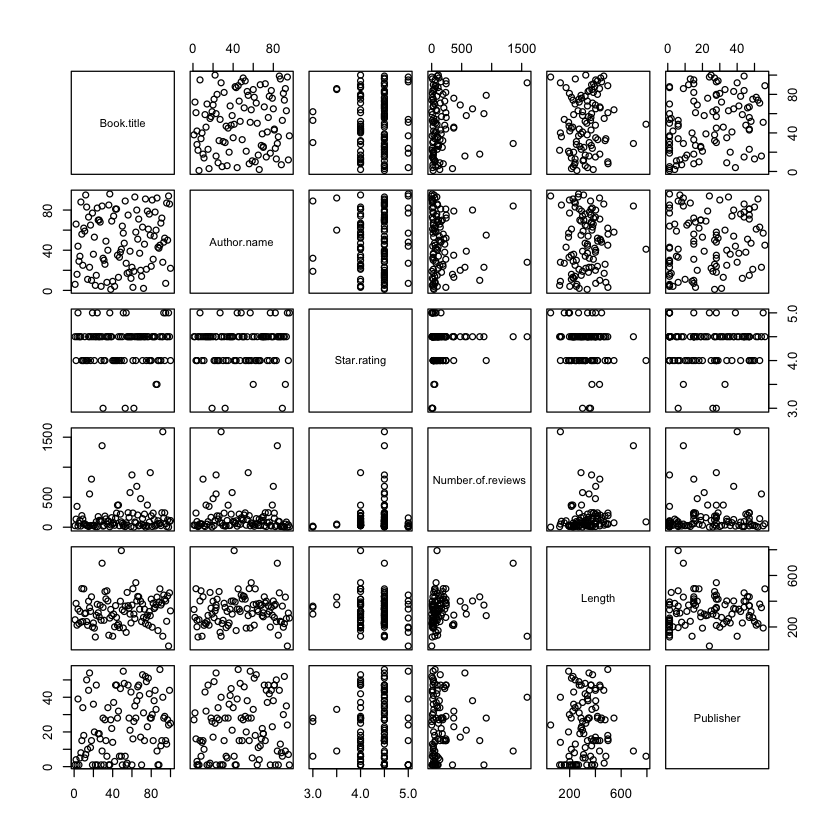

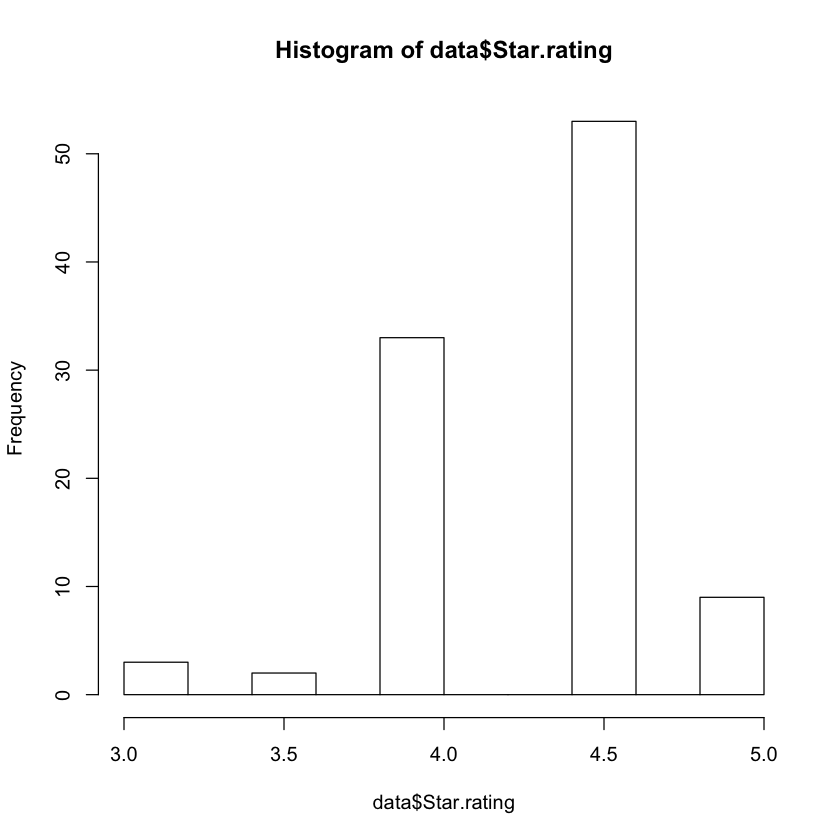

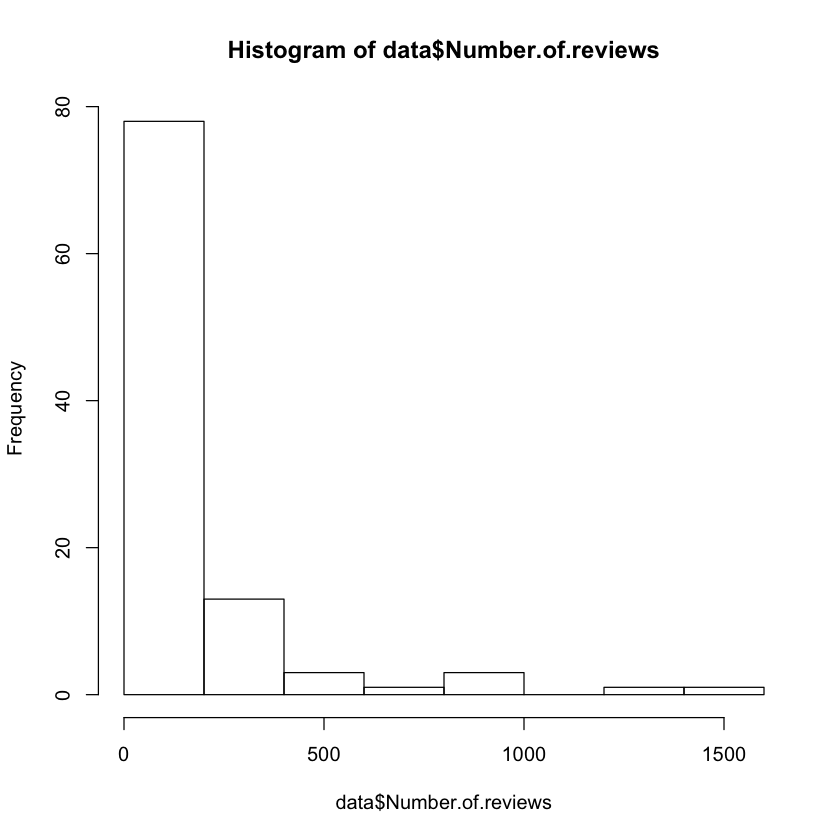

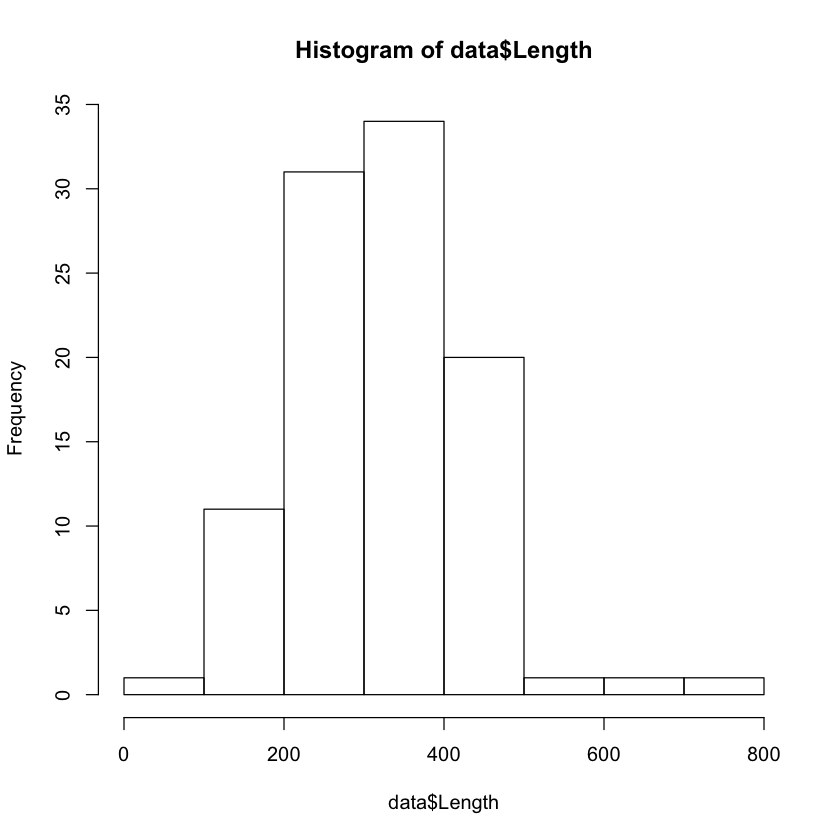

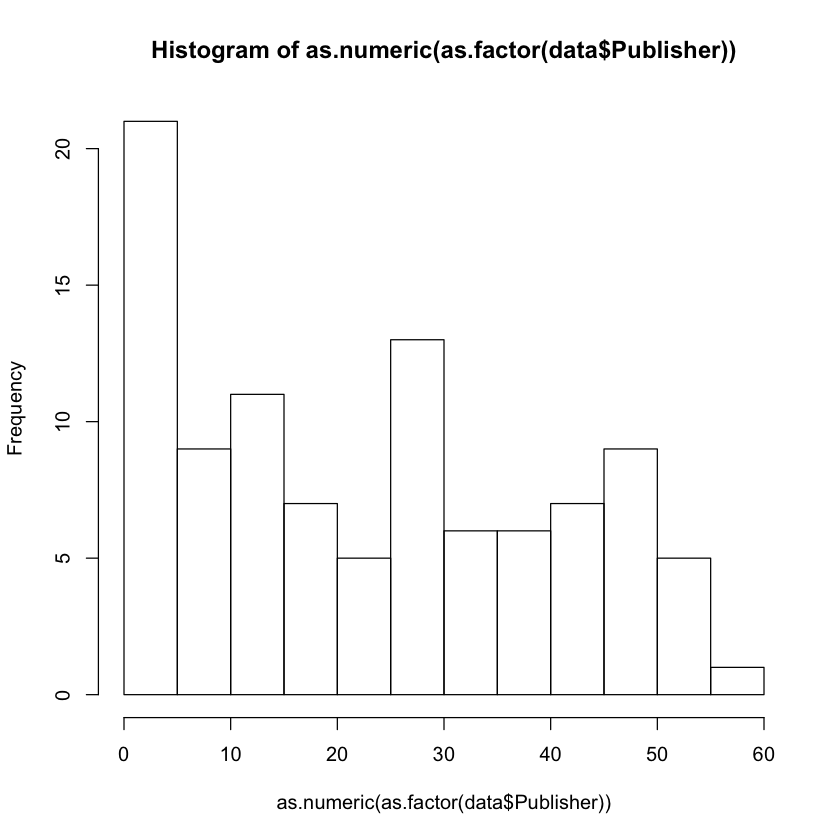

In [33]:
# Data is "2016_YA_books.csv"
data <- read.csv("2016_YA_books.csv", header = T)
data %>% summary
data %>%  str
plot(data)
hist(data$Star.rating)
hist(data$Number.of.reviews)
hist(data$Length)
hist(as.numeric(as.factor(data$Publisher)))

Book.title,Author.name,Star.rating,Number.of.reviews,Length,Publisher
Girl in Pieces,Kathleen Glasgow,4.5,139,418,Delacorte
Just Juliet,Charlotte Reagan,4.5,369,224,Inkitt
Tell Me Three Things,Julie Buxbaum,4.5,218,338,Delacorte
The Fever Code: Book Five,James Dashner,4.5,235,384,Delacorte
Saven Deception: Sci-Fi Alien Romance (The Saven Series Book 1),Kelly Hartigan,4.5,203,437,Siobhan Davis
Paper Princess: A Novel (The Royals Book 1),Erin Watt,4.5,871,370,Amazon
The Sun Is Also a Star,Nicola Yoon,4.5,241,386,Delacorte
Salt to the Sea,Ruta Sepetys,4.5,681,402,Philomel Books
Broken Prince: A Novel (The Royals Book 2),Erin Watt,4.5,554,350,Timeout
The Tales of Beedle the Bard (Hogwarts Library Book),J.K. Rowling,4.5,1591,128,Pottermore


                                      Book.title              Author.name
 Adorkable                                 : 1   Erin Watt          : 2  
 All American Boys                         : 1   Michelle Madow     : 2  
 Broken Prince: A Novel (The Royals Book 2): 1   Brandon Sanderson  : 1  
 Calamity (The Reckoners)                  : 1   Charlotte Reagan   : 1  
 Elementals 2: The Blood of the Hydra      : 1   Cookie O'Gorman    : 1  
 Elementals 3: The Head of Medusa          : 1   Denise Grover Swank: 1  
 (Other)                                   :21   (Other)            :19  
  Star.rating    Number.of.reviews     Length     
 Min.   :4.500   Min.   : 106.0    Min.   :128.0  
 1st Qu.:4.500   1st Qu.: 157.0    1st Qu.:305.0  
 Median :4.500   Median : 235.0    Median :365.0  
 Mean   :4.519   Mean   : 397.3    Mean   :358.6  
 3rd Qu.:4.500   3rd Qu.: 515.0    3rd Qu.:401.0  
 Max.   :5.000   Max.   :1591.0    Max.   :695.0  
                                                  


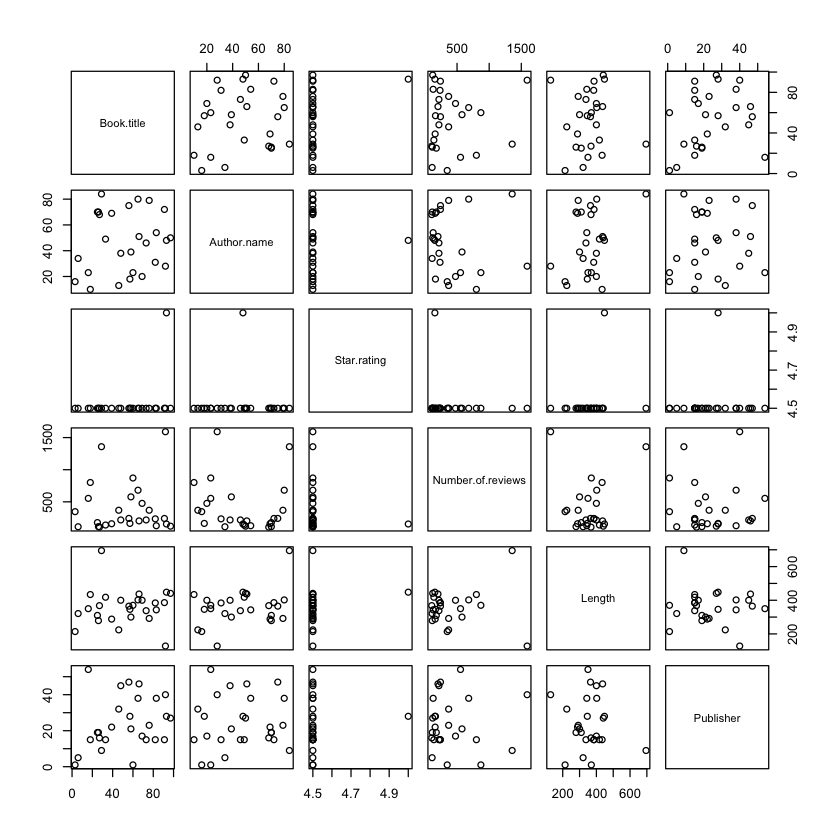

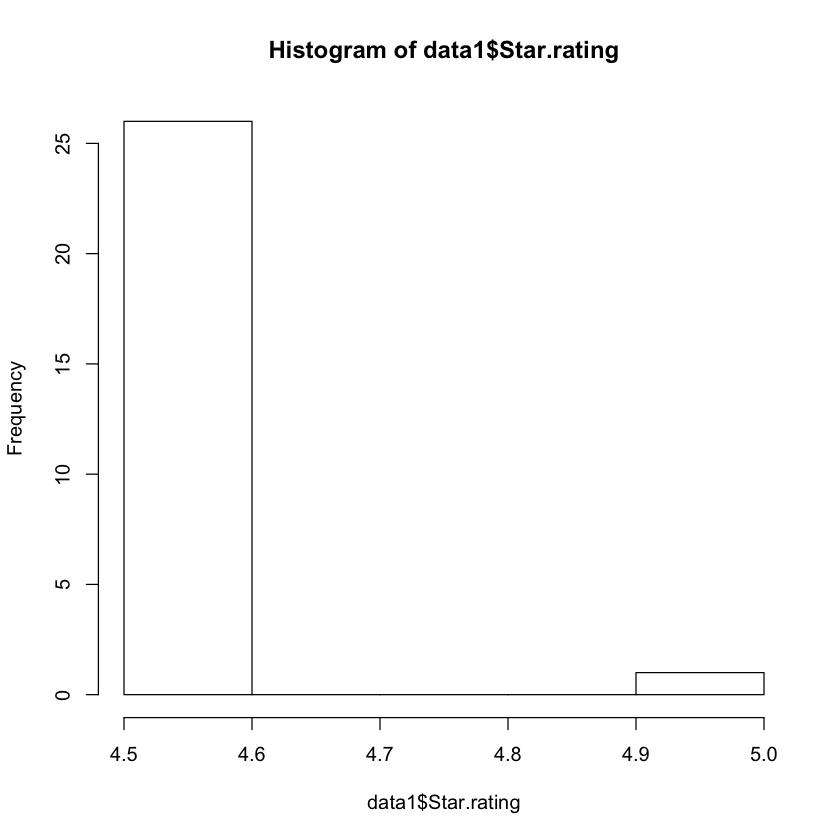

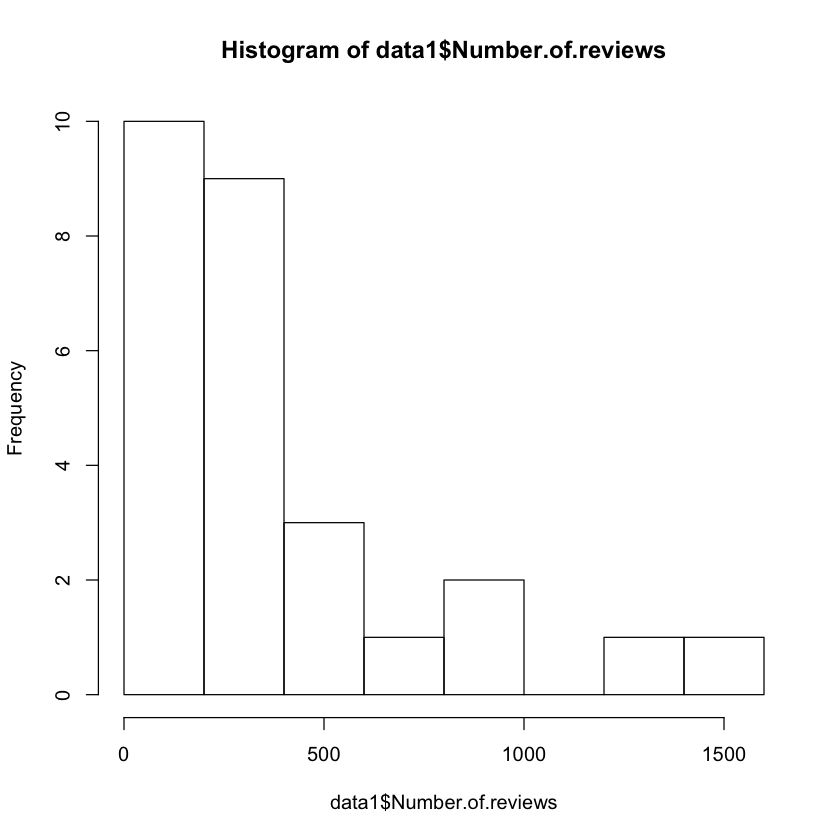

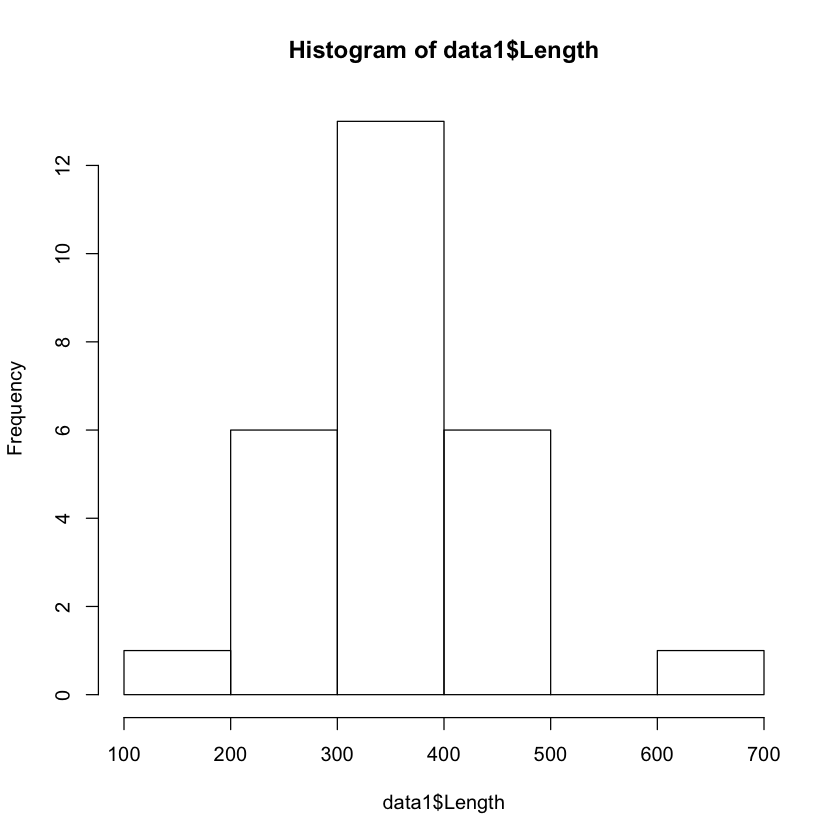

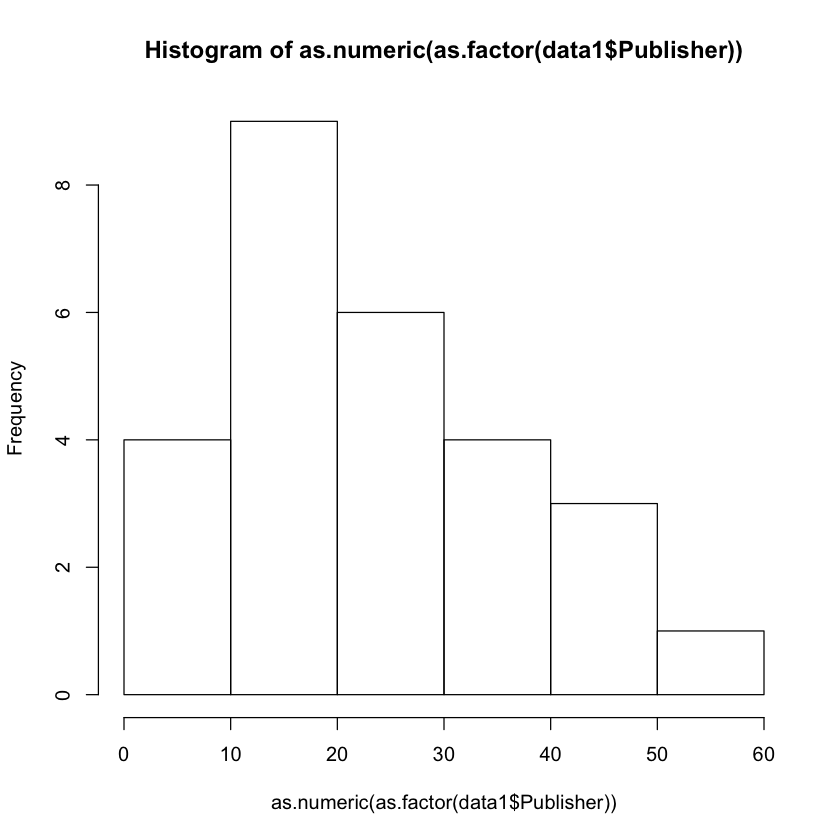

In [34]:
data1 <-  data %>%  filter(data$Star.rating >= '4.5' & data$Number.of.reviews >=100)
data1 %>% head(10)
data1 %>% summary
plot(data1)
hist(data1$Star.rating)
hist(data1$Number.of.reviews)
hist(data1$Length)
hist(as.numeric(as.factor(data1$Publisher)))

In [35]:
# correlation
cor.mat <- data.matrix(data)
dd.cor <-  cor(cor.mat) 
dd.cor
# The correlation of full dataset indicated only light negative correlation with Length  and NumberOfReview,
# with tiny correlation with Author name
# the number of review depend from the Length of book, but coefficient 0.15 not strong to nominate real signal

,Book.title,Author.name,Star.rating,Number.of.reviews,Length,Publisher
Book.title,1.0000000000,0.10717634,-0.0002176939,0.08346065,0.09256146,0.27181166
Author.name,0.1071763395,1.00000000,0.0403459310,-0.07699612,0.05332328,0.15185727
Star.rating,-0.0002176939,0.04034593,1.0000000000,0.09339000,-0.12574251,0.01477415
Number.of.reviews,0.0834606548,-0.07699612,0.0933900022,1.00000000,0.15443546,0.03610005
Length,0.0925614642,0.05332328,-0.1257425140,0.15443546,1.00000000,0.04951486
Publisher,0.2718116558,0.15185727,0.0147741454,0.03610005,0.04951486,1.00000000


In [36]:
#Exemining only successful authors I can see nice signal from Book.title and weak from Legth
# Number of review not indicate any strong correlation, but slightly with Author.name and Lenth
cor.mat1 <- data.matrix(data1)
dd.cor1 <-  cor(cor.mat1) 
dd.cor1


,Book.title,Author.name,Star.rating,Number.of.reviews,Length,Publisher
Book.title,1.00000000,0.12922495,0.28337376,0.03829587,0.02615605,0.27862801
Author.name,0.12922495,1.00000000,0.01208321,-0.13229900,0.31012339,0.07432430
Star.rating,0.28337376,0.01208321,1.00000000,-0.12764914,0.17661525,0.05426859
Number.of.reviews,0.03829587,-0.13229900,-0.12764914,1.00000000,0.07763590,-0.01316834
Length,0.02615605,0.31012339,0.17661525,0.07763590,1.00000000,-0.09156098
Publisher,0.27862801,0.07432430,0.05426859,-0.01316834,-0.09156098,1.00000000


In [37]:
#To confirm my outcome I will look anova analysis
#anova on all data clearly indicate correlation with Number of review and author.name
lmod <- lm(data$Star.rating~ data$Number.of.reviews+data$Author.name+ data$Length  , data)
anova(lmod)

Warning message in anova.lm(lmod):
“ANOVA F-tests on an essentially perfect fit are unreliable”

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
data$Number.of.reviews,1,1.380426e-01,1.380426e-01,9.891662e+30,1.010952e-31
data$Author.name,95,1.568946e+01,1.651522e-01,1.183424e+31,8.450055e-32
data$Length,1,1.167746e-31,1.167746e-31,8.367669e+00,1.016167e-01
Residuals,2,2.791090e-32,1.395545e-32,NA,NA


In [38]:
#data1$Publisher <- as.factor(data1$Publisher)
# anova on the high rating just proving significance of Author.name and light with Length
lmod1 <- lm(data1$Star.rating~  data1$Author.name+ data1$Length , data1)
lmod1 %>% anova()

Warning message in anova.lm(.):
“ANOVA F-tests on an essentially perfect fit are unreliable”

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
data1$Author.name,24,2.407407e-01,1.003086e-02,1.944034e+30,5.663247e-16
data1$Length,1,1.893021e-32,1.893021e-32,3.668775e+00,3.063143e-01
Residuals,1,5.159818e-33,5.159818e-33,NA,NA


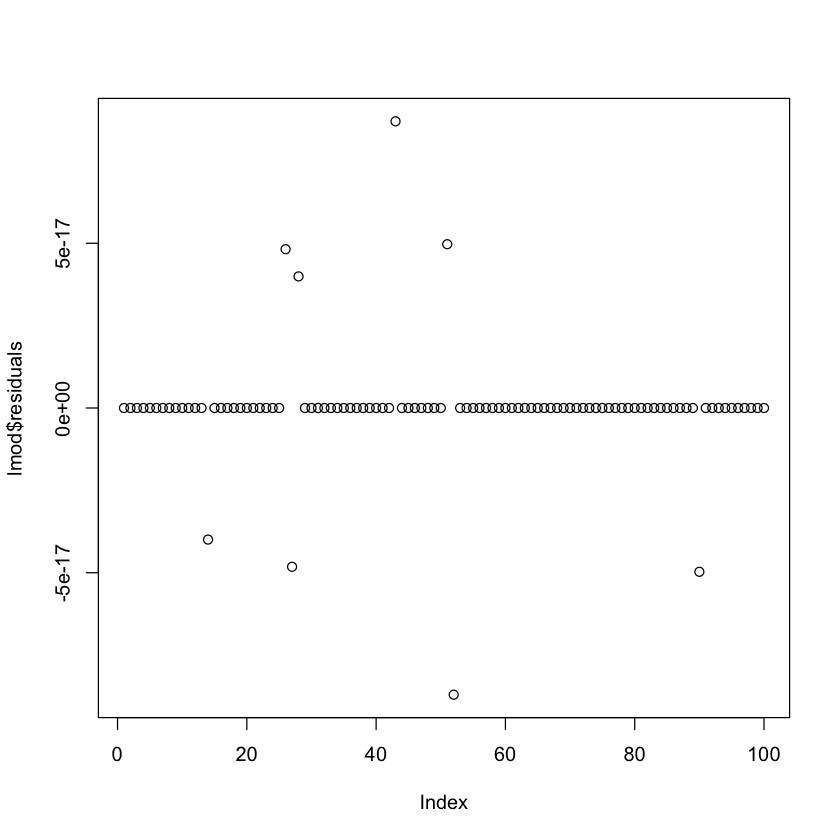

In [39]:
plot(lmod$residuals)  # plot of residuals mostly ZERO except of few datapoints
# we can see good linear relationship in the model, but it can be more clear without Lenth 

In [40]:
#anova on number of review have not significant evidence with any column, that is mean 
# we can not use subset only with successful authors to compare with unsuccessful to indicate dependency
lmod1 <- lm(data1$Number.of.reviews~ data1$Star.rating+ data1$Author.name+ data1$Length, data1)
lmod1 %>% anova()

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
data1$Star.rating,1,60946.84,60946.84,2.2603817,0.3736581
data1$Author.name,23,3627201.35,157704.41,5.8489029,0.3169208
data1$Length,1,25265.93,25265.93,0.9370565,0.5103451
Residuals,1,26963.07,26963.07,NA,NA


In [41]:
lmod1 <- lm(data$Number.of.reviews~ data$Star.rating+ data$Author.name+ data$Length, data)
lmod1 %>% anova()
# and we can see even with full dataset we did not appoint any column with P significant level
# in this case I conclude we have not enough information/data for strong model

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
data$Star.rating,1,59101.4046,59101.4046,3.09800043,0.1766155
data$Author.name,94,6659503.8454,70845.7856,3.71362197,0.1526011
data$Length,1,531.6765,531.6765,0.02786963,0.8780338
Residuals,3,57231.8235,19077.2745,NA,NA


In [42]:
# Let's test the variable we want to use with parametric and nonparametric text
t.test(data$Star.rating, data$Length, var.equal = T)  #p-value < 2.2e-16, Length is significant for the rating
t.test(data$Number.of.reviews, data$Length, var.equal = T)  #p-value < 2.2e-16, Length also significant for the review



	Two Sample t-test

data:  data$Star.rating and data$Length
t = -27.832, df = 198, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -346.0194 -300.2306
sample estimates:
mean of x mean of y 
    4.315   327.440 



	Two Sample t-test

data:  data$Number.of.reviews and data$Length
t = -5.6909, df = 198, p-value = 4.501e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -219.3346 -106.4454
sample estimates:
mean of x mean of y 
   164.55    327.44 


In [43]:
wilcox.test(data$Star.rating, data$Length)
# Nonparametric test also proving the Length and rating correlation


	Wilcoxon rank sum test with continuity correction

data:  data$Star.rating and data$Length
W = 0, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [44]:
kr.test <- kruskal.test(data$Star.rating~ data$Length, data =data)
kr.test
# BTW KruskalWallis test rank test not catching the same p level


	Kruskal-Wallis rank sum test

data:  data$Star.rating by data$Length
Kruskal-Wallis chi-squared = 85.153, df = 78, p-value = 0.2712


In [45]:
library(highlightr)
library(tidytext)
library(syuzhet)
library(stringr)
library(tidytext)

ERROR: Error in library(highlightr): there is no package called ‘highlightr’
